# BÀI THỰC HÀNH TUẦN 5
## K-NN, Multinomial Naive Bayes, Logistic Regression

**Thông tin sinh viên:**
- MSSV: 23001837
- Họ và tên: Bùi Quang Chiến
- Lớp: K68 - KHMT&TT

---

## Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import struct
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

---
# PHẦN 1: K-NEAREST NEIGHBORS (K-NN)
---

## Bài 1: K-NN với Iris Dataset

In [3]:
# Đọc dữ liệu Iris
iris_df = pd.read_csv('iris.csv')
print("Thông tin dữ liệu Iris:")
print(iris_df.info())
print("\nMô tả thống kê:")
print(iris_df.describe())
print("\nSố lượng mẫu theo từng loại:")
print(iris_df['variety'].value_counts())

Thông tin dữ liệu Iris:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Mô tả thống kê:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.9000

In [5]:
# Chuẩn bị dữ liệu
X_iris = iris_df.drop('variety', axis=1).values
y_iris = iris_df['variety'].values

# Chia dữ liệu train/test
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Chuẩn hóa dữ liệu
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print(f"Kích thước tập train: {X_train_iris.shape}")
print(f"Kích thước tập test: {X_test_iris.shape}")

Kích thước tập train: (105, 4)
Kích thước tập test: (45, 4)


### Bài 1.1: Tìm giá trị K tối ưu

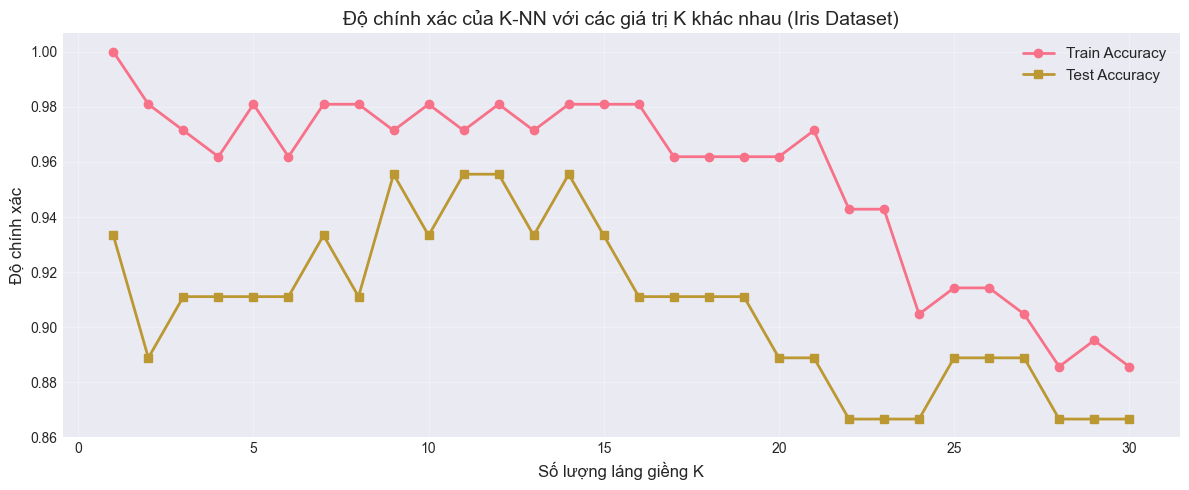


Giá trị K tối ưu: 9
Độ chính xác cao nhất trên tập test: 0.9556


In [6]:
# Thử nghiệm với các giá trị K khác nhau
k_values = range(1, 31)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris_scaled, y_train_iris)
    
    train_score = knn.score(X_train_iris_scaled, y_train_iris)
    test_score = knn.score(X_test_iris_scaled, y_test_iris)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Số lượng láng giềng K', fontsize=12)
plt.ylabel('Độ chính xác', fontsize=12)
plt.title('Độ chính xác của K-NN với các giá trị K khác nhau (Iris Dataset)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tìm K tốt nhất
best_k = k_values[np.argmax(test_scores)]
best_accuracy = max(test_scores)
print(f"\nGiá trị K tối ưu: {best_k}")
print(f"Độ chính xác cao nhất trên tập test: {best_accuracy:.4f}")

### Bài 1.2: Đánh giá mô hình K-NN với K tối ưu

KẾT QUẢ K-NN VỚI K=9 TRÊN IRIS DATASET

Độ chính xác: 0.9556

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      1.00      0.94        15
   Virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



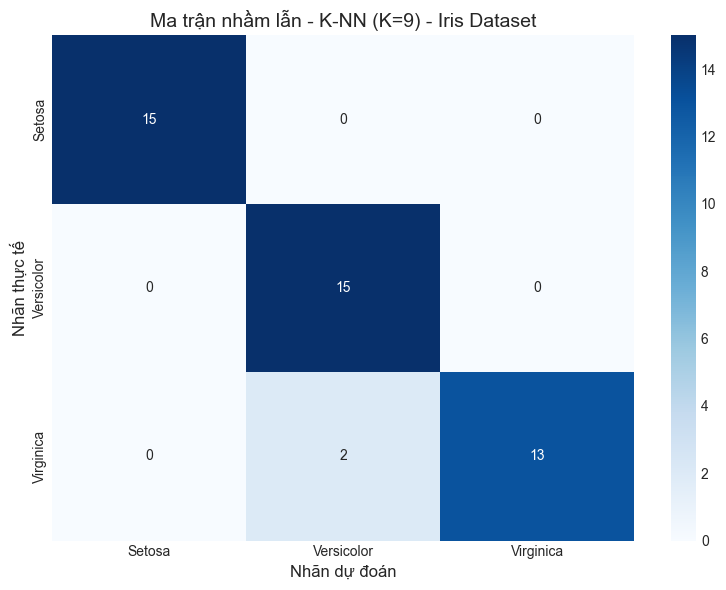

In [7]:
# Huấn luyện mô hình với K tối ưu
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_iris_scaled, y_train_iris)

# Dự đoán
y_pred_iris = knn_best.predict(X_test_iris_scaled)

# Đánh giá
print("="*60)
print(f"KẾT QUẢ K-NN VỚI K={best_k} TRÊN IRIS DATASET")
print("="*60)
print(f"\nĐộ chính xác: {accuracy_score(y_test_iris, y_pred_iris):.4f}")
print(f"\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test_iris, y_pred_iris))

# Ma trận nhầm lẫn
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_iris), 
            yticklabels=np.unique(y_iris))
plt.title(f'Ma trận nhầm lẫn - K-NN (K={best_k}) - Iris Dataset', fontsize=14)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.tight_layout()
plt.show()

### Bài 1.3: Cross-validation

In [8]:
# Cross-validation với K tối ưu
cv_scores = cross_val_score(knn_best, X_iris, y_iris, cv=5, scoring='accuracy')
print("Kết quả Cross-Validation (5-fold):")
print(f"Độ chính xác từng fold: {cv_scores}")
print(f"Độ chính xác trung bình: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Kết quả Cross-Validation (5-fold):
Độ chính xác từng fold: [0.96666667 1.         0.96666667 0.93333333 1.        ]
Độ chính xác trung bình: 0.9733 (+/- 0.0499)


## Bài 2: K-NN với MNIST Dataset

In [9]:
# Hàm đọc dữ liệu MNIST
def read_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>4I', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)
    return images

def read_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack('>2I', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Đọc dữ liệu MNIST
print("Đang đọc dữ liệu MNIST...")
X_train_mnist = read_mnist_images('train-images.idx3-ubyte')
y_train_mnist = read_mnist_labels('train-labels.idx1-ubyte')
X_test_mnist = read_mnist_images('t10k-images.idx3-ubyte')
y_test_mnist = read_mnist_labels('t10k-labels.idx1-ubyte')

print(f"\nKích thước dữ liệu train: {X_train_mnist.shape}")
print(f"Kích thước dữ liệu test: {X_test_mnist.shape}")
print(f"Số lượng nhãn train: {y_train_mnist.shape}")
print(f"Số lượng nhãn test: {y_test_mnist.shape}")

Đang đọc dữ liệu MNIST...

Kích thước dữ liệu train: (60000, 784)
Kích thước dữ liệu test: (10000, 784)
Số lượng nhãn train: (60000,)
Số lượng nhãn test: (10000,)

Kích thước dữ liệu train: (60000, 784)
Kích thước dữ liệu test: (10000, 784)
Số lượng nhãn train: (60000,)
Số lượng nhãn test: (10000,)


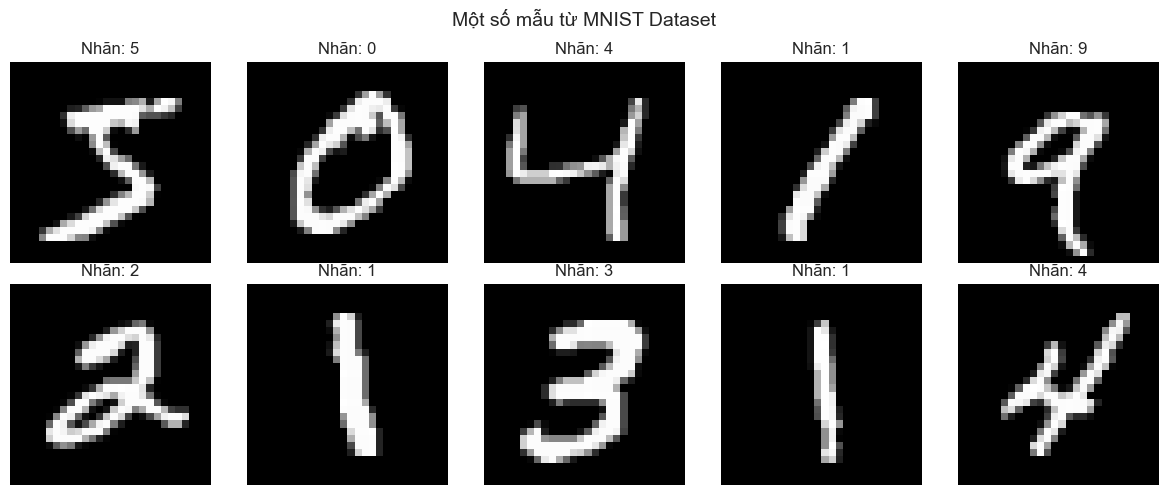

In [10]:
# Hiển thị một số ảnh mẫu
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_mnist[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Nhãn: {y_train_mnist[i]}')
    ax.axis('off')
plt.suptitle('Một số mẫu từ MNIST Dataset', fontsize=14)
plt.tight_layout()
plt.show()

### Bài 2.1: Sử dụng tập con để tăng tốc độ huấn luyện

In [11]:
# Sử dụng subset để giảm thời gian huấn luyện
# Lấy 10000 mẫu train và 2000 mẫu test
subset_train_size = 10000
subset_test_size = 2000

np.random.seed(42)
train_indices = np.random.choice(len(X_train_mnist), subset_train_size, replace=False)
test_indices = np.random.choice(len(X_test_mnist), subset_test_size, replace=False)

X_train_mnist_subset = X_train_mnist[train_indices]
y_train_mnist_subset = y_train_mnist[train_indices]
X_test_mnist_subset = X_test_mnist[test_indices]
y_test_mnist_subset = y_test_mnist[test_indices]

# Chuẩn hóa dữ liệu
X_train_mnist_scaled = X_train_mnist_subset / 255.0
X_test_mnist_scaled = X_test_mnist_subset / 255.0

print(f"Số mẫu train: {X_train_mnist_subset.shape[0]}")
print(f"Số mẫu test: {X_test_mnist_subset.shape[0]}")

Số mẫu train: 10000
Số mẫu test: 2000


### Bài 2.2: Tìm K tối ưu cho MNIST

Đang huấn luyện K-NN với các giá trị K khác nhau...
Đang thử K=1...
  Độ chính xác: 0.9500
Đang thử K=3...
  Độ chính xác: 0.9500
Đang thử K=3...
  Độ chính xác: 0.9535
Đang thử K=5...
  Độ chính xác: 0.9520
Đang thử K=7...
  Độ chính xác: 0.9535
Đang thử K=5...
  Độ chính xác: 0.9520
Đang thử K=7...
  Độ chính xác: 0.9520
Đang thử K=9...
  Độ chính xác: 0.9475
Đang thử K=11...
  Độ chính xác: 0.9520
Đang thử K=9...
  Độ chính xác: 0.9475
Đang thử K=11...
  Độ chính xác: 0.9470
Đang thử K=13...
  Độ chính xác: 0.9435
Đang thử K=15...
  Độ chính xác: 0.9470
Đang thử K=13...
  Độ chính xác: 0.9435
Đang thử K=15...
  Độ chính xác: 0.9415
  Độ chính xác: 0.9415


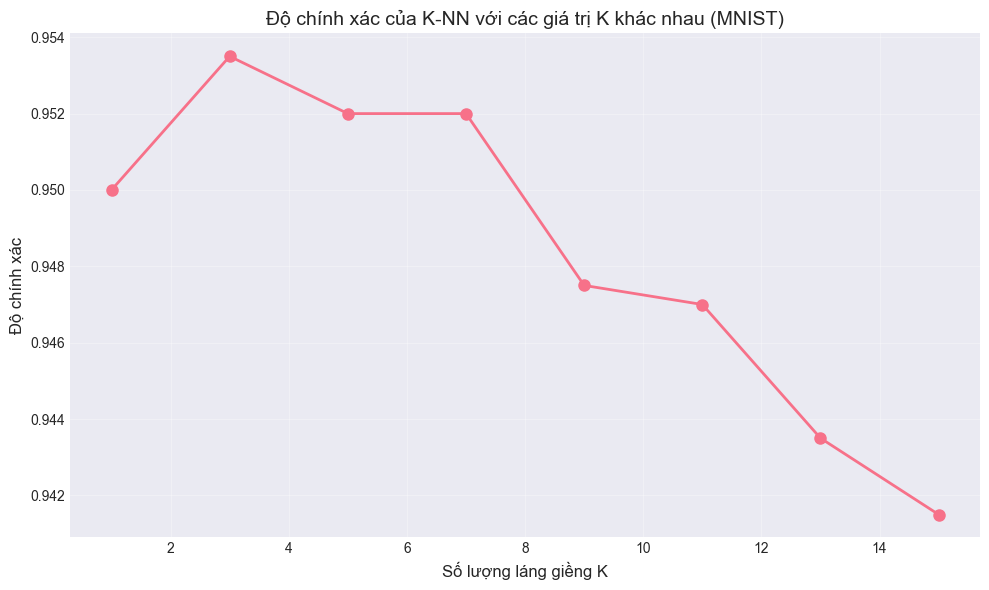


Giá trị K tối ưu cho MNIST: 3
Độ chính xác cao nhất: 0.9535


In [14]:
# Thử nghiệm với các giá trị K khác nhau
k_values_mnist = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies_mnist = []

print("Đang huấn luyện K-NN với các giá trị K khác nhau...")
for k in k_values_mnist:
    print(f"Đang thử K={k}...")
    knn_mnist = KNeighborsClassifier(n_neighbors=k)
    knn_mnist.fit(X_train_mnist_scaled, y_train_mnist_subset)
    accuracy = knn_mnist.score(X_test_mnist_scaled, y_test_mnist_subset)
    accuracies_mnist.append(accuracy)
    print(f"  Độ chính xác: {accuracy:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(k_values_mnist, accuracies_mnist, marker='o', linewidth=2, markersize=8)
plt.xlabel('Số lượng láng giềng K', fontsize=12)
plt.ylabel('Độ chính xác', fontsize=12)
plt.title('Độ chính xác của K-NN với các giá trị K khác nhau (MNIST)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_k_mnist = k_values_mnist[np.argmax(accuracies_mnist)]
print(f"\nGiá trị K tối ưu cho MNIST: {best_k_mnist}")
print(f"Độ chính xác cao nhất: {max(accuracies_mnist):.4f}")

### Bài 2.3: Đánh giá chi tiết mô hình K-NN trên MNIST

In [15]:
# Huấn luyện với K tối ưu
knn_mnist_best = KNeighborsClassifier(n_neighbors=best_k_mnist)
knn_mnist_best.fit(X_train_mnist_scaled, y_train_mnist_subset)

# Dự đoán
y_pred_mnist = knn_mnist_best.predict(X_test_mnist_scaled)

# Đánh giá
print("="*60)
print(f"KẾT QUẢ K-NN VỚI K={best_k_mnist} TRÊN MNIST DATASET")
print("="*60)
print(f"\nĐộ chính xác: {accuracy_score(y_test_mnist_subset, y_pred_mnist):.4f}")
print(f"\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test_mnist_subset, y_pred_mnist))

KẾT QUẢ K-NN VỚI K=3 TRÊN MNIST DATASET

Độ chính xác: 0.9535

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       200
           1       0.90      1.00      0.95       233
           2       0.98      0.92      0.95       199
           3       0.96      0.96      0.96       201
           4       0.95      0.91      0.93       176
           5       0.95      0.95      0.95       174
           6       0.98      0.97      0.98       200
           7       0.94      0.97      0.95       201
           8       0.99      0.90      0.95       215
           9       0.95      0.95      0.95       201

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



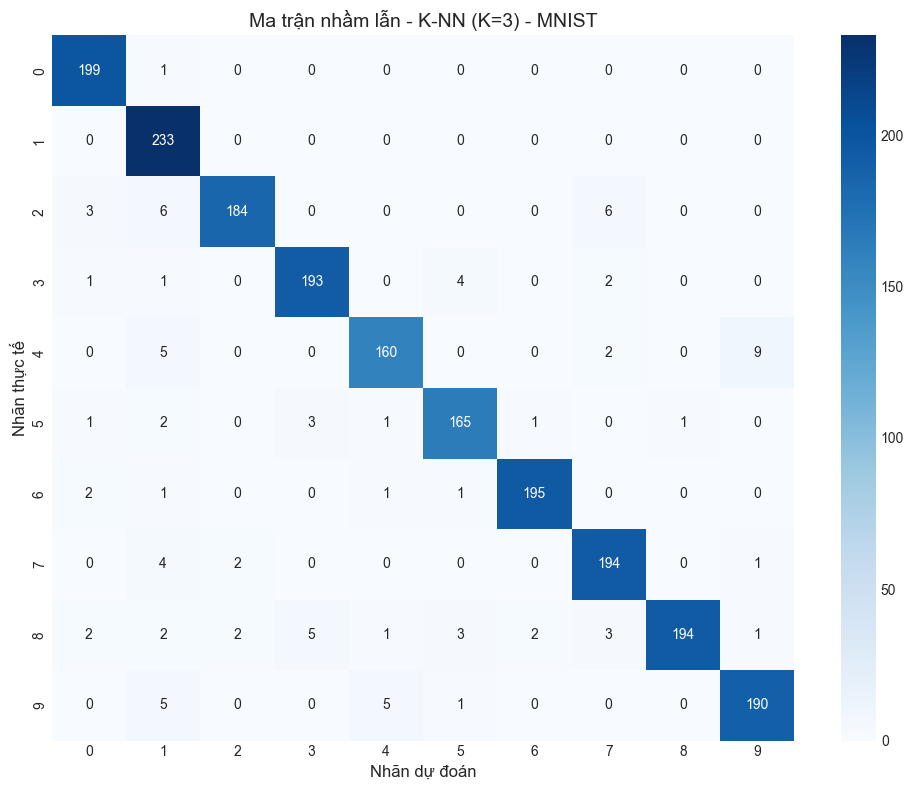

In [16]:
# Ma trận nhầm lẫn
cm_mnist = confusion_matrix(y_test_mnist_subset, y_pred_mnist)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Ma trận nhầm lẫn - K-NN (K={best_k_mnist}) - MNIST', fontsize=14)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.tight_layout()
plt.show()

Số lượng dự đoán sai: 93


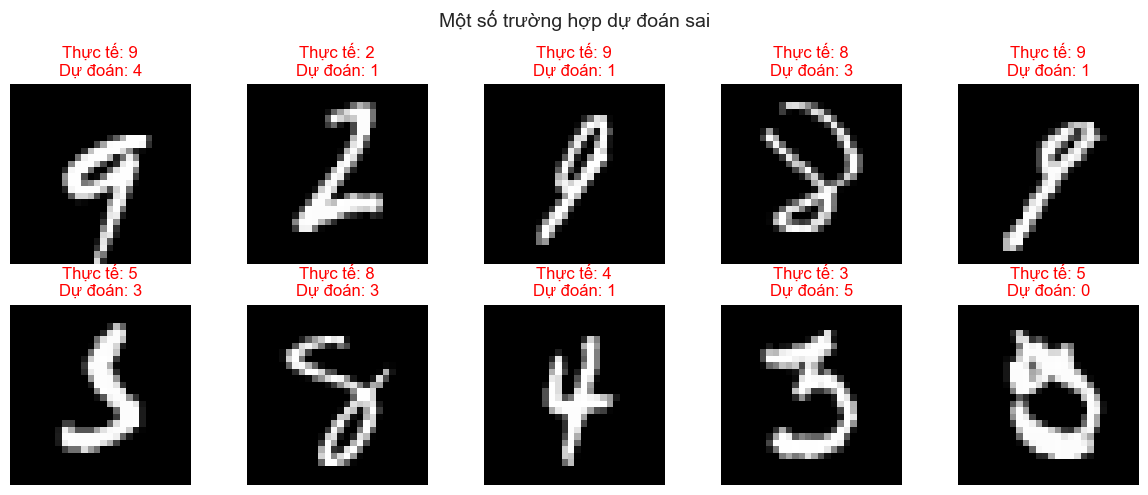

In [17]:
# Hiển thị một số trường hợp dự đoán sai
misclassified_indices = np.where(y_test_mnist_subset != y_pred_mnist)[0]
print(f"Số lượng dự đoán sai: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        if i < len(misclassified_indices):
            idx = misclassified_indices[i]
            ax.imshow(X_test_mnist_subset[idx].reshape(28, 28), cmap='gray')
            ax.set_title(f'Thực tế: {y_test_mnist_subset[idx]}\nDự đoán: {y_pred_mnist[idx]}',
                        color='red')
            ax.axis('off')
    plt.suptitle('Một số trường hợp dự đoán sai', fontsize=14)
    plt.tight_layout()
    plt.show()

---
# PHẦN 2: MULTINOMIAL NAIVE BAYES
---

## Bài 3: Multinomial Naive Bayes trên MNIST

In [18]:
# Sử dụng MultinomialNB (yêu cầu giá trị không âm)
# Dữ liệu MNIST đã được chuẩn hóa về [0, 1]

print("Đang huấn luyện Multinomial Naive Bayes...")
mnb = MultinomialNB()
mnb.fit(X_train_mnist_scaled, y_train_mnist_subset)

# Dự đoán
y_pred_mnb = mnb.predict(X_test_mnist_scaled)

# Đánh giá
print("="*60)
print("KẾT QUẢ MULTINOMIAL NAIVE BAYES TRÊN MNIST DATASET")
print("="*60)
print(f"\nĐộ chính xác: {accuracy_score(y_test_mnist_subset, y_pred_mnb):.4f}")
print(f"\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test_mnist_subset, y_pred_mnb))

Đang huấn luyện Multinomial Naive Bayes...
KẾT QUẢ MULTINOMIAL NAIVE BAYES TRÊN MNIST DATASET

Độ chính xác: 0.8385

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       200
           1       0.90      0.93      0.92       233
           2       0.91      0.85      0.88       199
           3       0.81      0.85      0.83       201
           4       0.85      0.75      0.80       176
           5       0.82      0.67      0.74       174
           6       0.92      0.92      0.92       200
           7       0.91      0.83      0.87       201
           8       0.67      0.77      0.72       215
           9       0.72      0.84      0.78       201

    accuracy                           0.84      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.84      0.84      0.84      2000



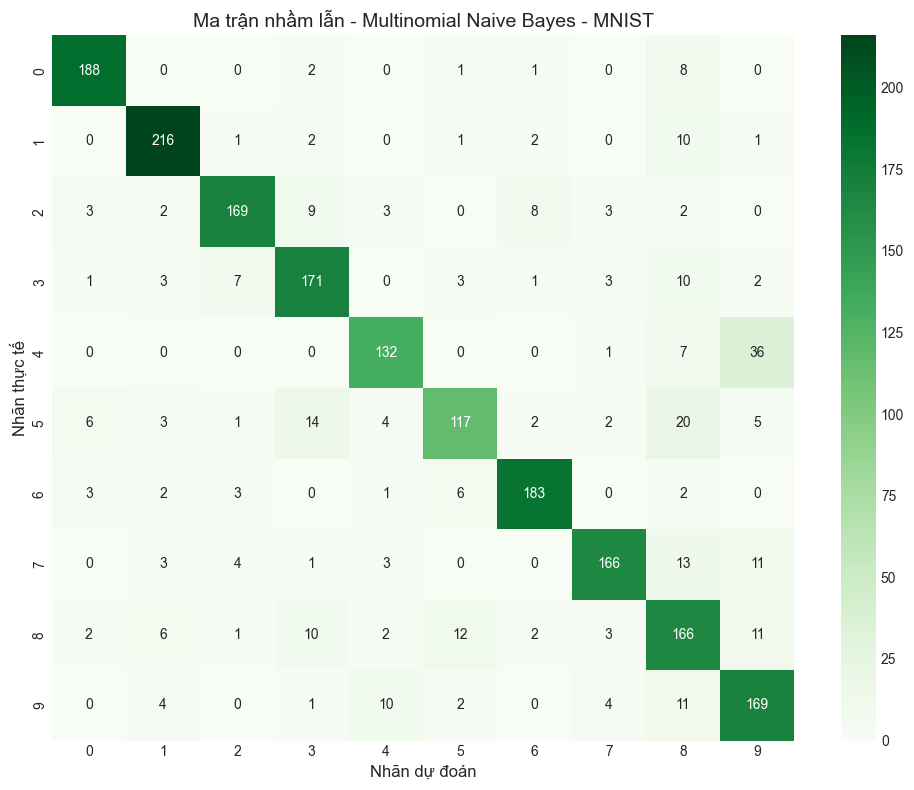

In [19]:
# Ma trận nhầm lẫn
cm_mnb = confusion_matrix(y_test_mnist_subset, y_pred_mnb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Ma trận nhầm lẫn - Multinomial Naive Bayes - MNIST', fontsize=14)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.tight_layout()
plt.show()

### So sánh K-NN và Multinomial NB


SO SÁNH HIỆU SUẤT GIỮA K-NN VÀ MULTINOMIAL NB TRÊN MNIST:
       Mô hình  Độ chính xác  Precision (macro)  Recall (macro)  F1-Score (macro)
          K-NN        0.9535           0.955466        0.952496          0.953283
Multinomial NB        0.8385           0.844582        0.834320          0.837127


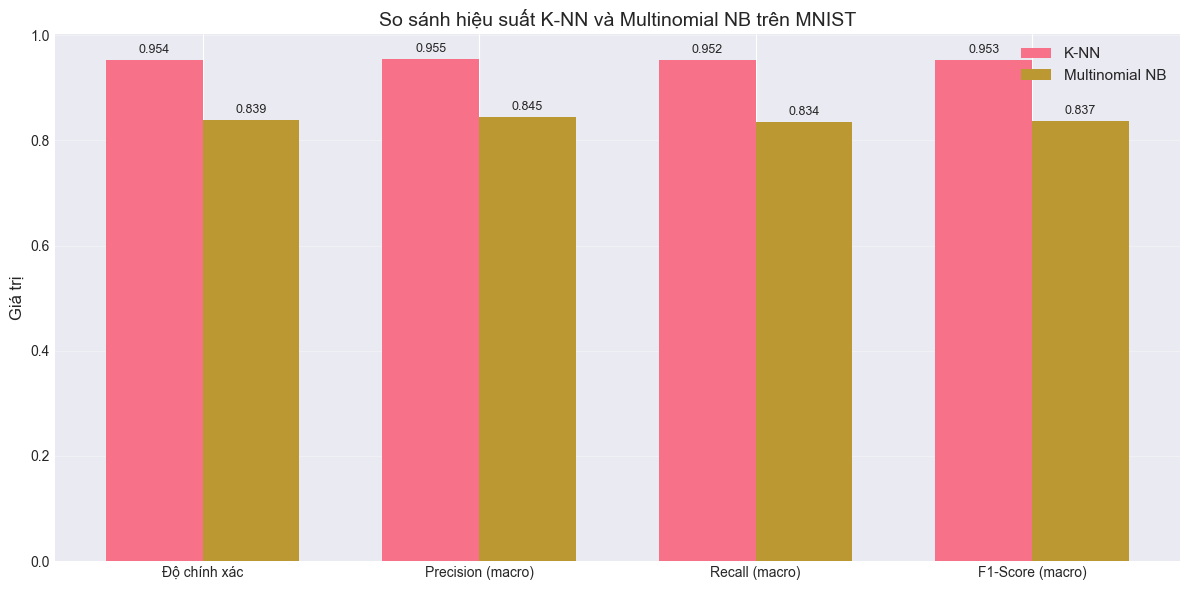

In [20]:
# So sánh hiệu suất
comparison_data = {
    'Mô hình': ['K-NN', 'Multinomial NB'],
    'Độ chính xác': [
        accuracy_score(y_test_mnist_subset, y_pred_mnist),
        accuracy_score(y_test_mnist_subset, y_pred_mnb)
    ],
    'Precision (macro)': [
        precision_score(y_test_mnist_subset, y_pred_mnist, average='macro'),
        precision_score(y_test_mnist_subset, y_pred_mnb, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test_mnist_subset, y_pred_mnist, average='macro'),
        recall_score(y_test_mnist_subset, y_pred_mnb, average='macro')
    ],
    'F1-Score (macro)': [
        f1_score(y_test_mnist_subset, y_pred_mnist, average='macro'),
        f1_score(y_test_mnist_subset, y_pred_mnb, average='macro')
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nSO SÁNH HIỆU SUẤT GIỮA K-NN VÀ MULTINOMIAL NB TRÊN MNIST:")
print("="*70)
print(comparison_df.to_string(index=False))

# Vẽ biểu đồ so sánh
metrics = ['Độ chính xác', 'Precision (macro)', 'Recall (macro)', 'F1-Score (macro)']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, comparison_df.iloc[0, 1:], width, label='K-NN')
rects2 = ax.bar(x + width/2, comparison_df.iloc[1, 1:], width, label='Multinomial NB')

ax.set_ylabel('Giá trị', fontsize=12)
ax.set_title('So sánh hiệu suất K-NN và Multinomial NB trên MNIST', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Thêm giá trị lên cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

---
# PHẦN 3: LOGISTIC REGRESSION
---

## Bài 4: Logistic Regression trên Glass Dataset

In [21]:
# Đọc dữ liệu Glass
glass_df = pd.read_csv('glass.csv')
print("Thông tin dữ liệu Glass:")
print(glass_df.info())
print("\nMô tả thống kê:")
print(glass_df.describe())
print("\nSố lượng mẫu theo từng loại:")
print(glass_df['Type'].value_counts().sort_index())

Thông tin dữ liệu Glass:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None

Mô tả thống kê:
        Id_Number          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000  136.384539   13.407850    2.684533    1.444907   72.650935   
std     61.920648   45.760432    0

In [22]:
# Chuẩn bị dữ liệu
X_glass = glass_df.drop(['Id_Number', 'Type'], axis=1).values
y_glass = glass_df['Type'].values

# Chia dữ liệu train/test
X_train_glass, X_test_glass, y_train_glass, y_test_glass = train_test_split(
    X_glass, y_glass, test_size=0.3, random_state=42, stratify=y_glass
)

# Chuẩn hóa dữ liệu
scaler_glass = StandardScaler()
X_train_glass_scaled = scaler_glass.fit_transform(X_train_glass)
X_test_glass_scaled = scaler_glass.transform(X_test_glass)

print(f"\nKích thước tập train: {X_train_glass.shape}")
print(f"Kích thước tập test: {X_test_glass.shape}")
print(f"Các loại thủy tinh: {np.unique(y_glass)}")


Kích thước tập train: (149, 9)
Kích thước tập test: (65, 9)
Các loại thủy tinh: [1 2 3 5 6 7]


### Bài 4.1: Huấn luyện Logistic Regression

Đang huấn luyện Logistic Regression...
C= 0.001 - Train Accuracy: 0.3557, Test Accuracy: 0.3538
C= 0.010 - Train Accuracy: 0.5503, Test Accuracy: 0.5692
C= 0.100 - Train Accuracy: 0.5973, Test Accuracy: 0.6000
C= 1.000 - Train Accuracy: 0.6376, Test Accuracy: 0.7231
C=10.000 - Train Accuracy: 0.6644, Test Accuracy: 0.7231
C=100.000 - Train Accuracy: 0.6376, Test Accuracy: 0.7077


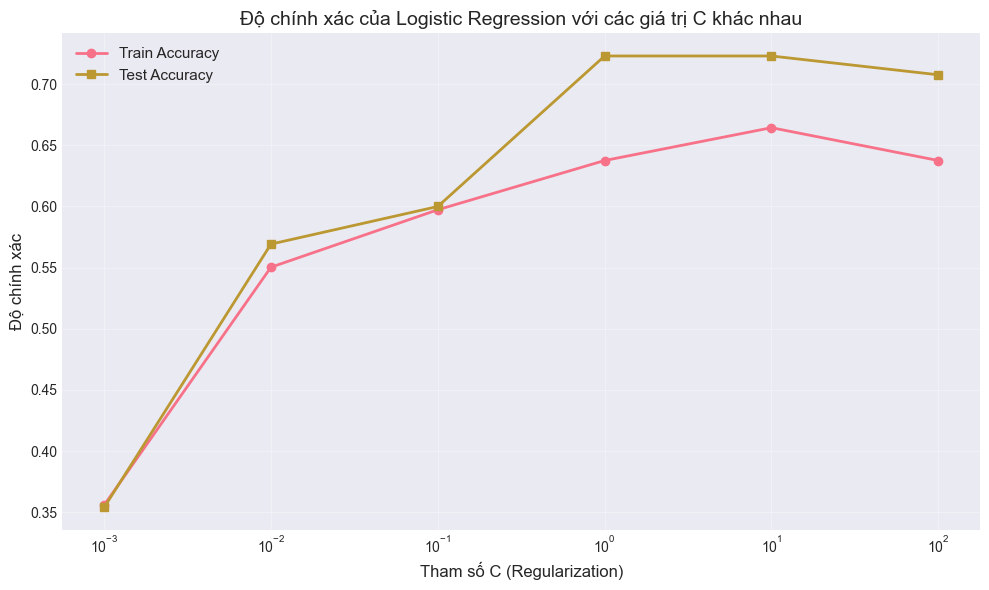


Giá trị C tối ưu: 1
Độ chính xác cao nhất: 0.7231


In [23]:
# Huấn luyện Logistic Regression với các tham số khác nhau
print("Đang huấn luyện Logistic Regression...")

# Thử nghiệm với các giá trị C khác nhau (regularization parameter)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores_lr = []
test_scores_lr = []

for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000, random_state=42, multi_class='ovr')
    lr.fit(X_train_glass_scaled, y_train_glass)
    
    train_score = lr.score(X_train_glass_scaled, y_train_glass)
    test_score = lr.score(X_test_glass_scaled, y_test_glass)
    
    train_scores_lr.append(train_score)
    test_scores_lr.append(test_score)
    print(f"C={C:6.3f} - Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores_lr, marker='o', label='Train Accuracy', linewidth=2)
plt.semilogx(C_values, test_scores_lr, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Tham số C (Regularization)', fontsize=12)
plt.ylabel('Độ chính xác', fontsize=12)
plt.title('Độ chính xác của Logistic Regression với các giá trị C khác nhau', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_C = C_values[np.argmax(test_scores_lr)]
print(f"\nGiá trị C tối ưu: {best_C}")
print(f"Độ chính xác cao nhất: {max(test_scores_lr):.4f}")

### Bài 4.2: Đánh giá mô hình Logistic Regression

In [24]:
# Huấn luyện với C tối ưu
lr_best = LogisticRegression(C=best_C, max_iter=1000, random_state=42, multi_class='ovr')
lr_best.fit(X_train_glass_scaled, y_train_glass)

# Dự đoán
y_pred_glass = lr_best.predict(X_test_glass_scaled)

# Đánh giá
print("="*60)
print(f"KẾT QUẢ LOGISTIC REGRESSION VỚI C={best_C} TRÊN GLASS DATASET")
print("="*60)
print(f"\nĐộ chính xác: {accuracy_score(y_test_glass, y_pred_glass):.4f}")
print(f"\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test_glass, y_pred_glass))

KẾT QUẢ LOGISTIC REGRESSION VỚI C=1 TRÊN GLASS DATASET

Độ chính xác: 0.7231

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           1       0.62      0.86      0.72        21
           2       0.71      0.65      0.68        23
           3       0.00      0.00      0.00         5
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         9

    accuracy                           0.72        65
   macro avg       0.67      0.65      0.65        65
weighted avg       0.68      0.72      0.70        65



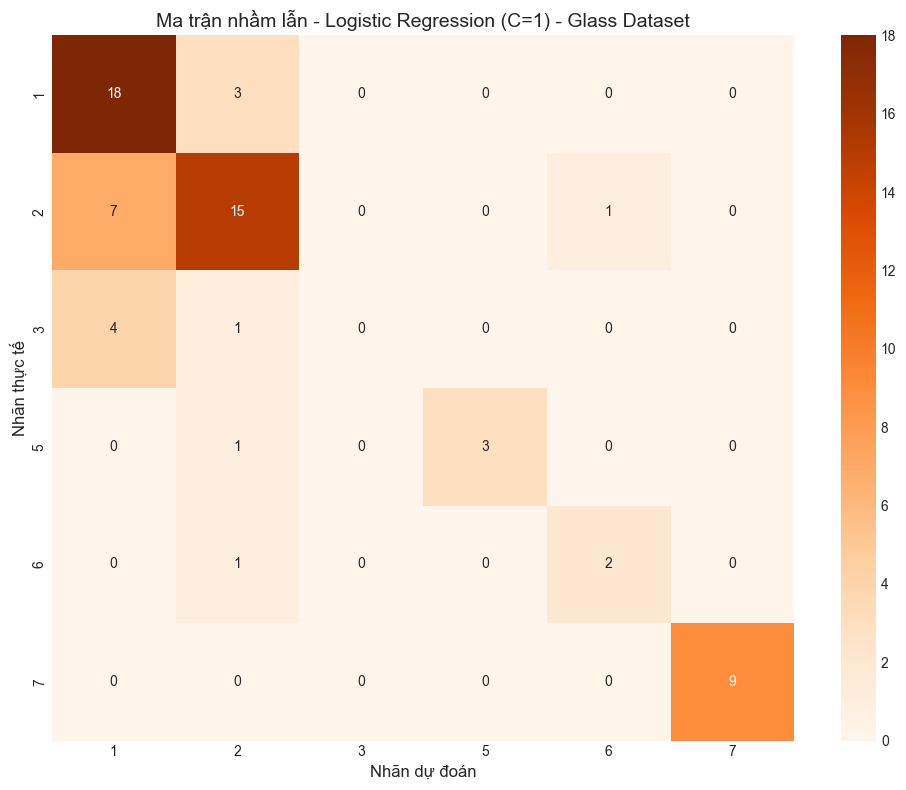

In [25]:
# Ma trận nhầm lẫn
cm_glass = confusion_matrix(y_test_glass, y_pred_glass)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_glass, annot=True, fmt='d', cmap='Oranges', cbar=True,
            xticklabels=np.unique(y_glass),
            yticklabels=np.unique(y_glass))
plt.title(f'Ma trận nhầm lẫn - Logistic Regression (C={best_C}) - Glass Dataset', fontsize=14)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.tight_layout()
plt.show()

### Bài 4.3: Phân tích trọng số (Coefficients)

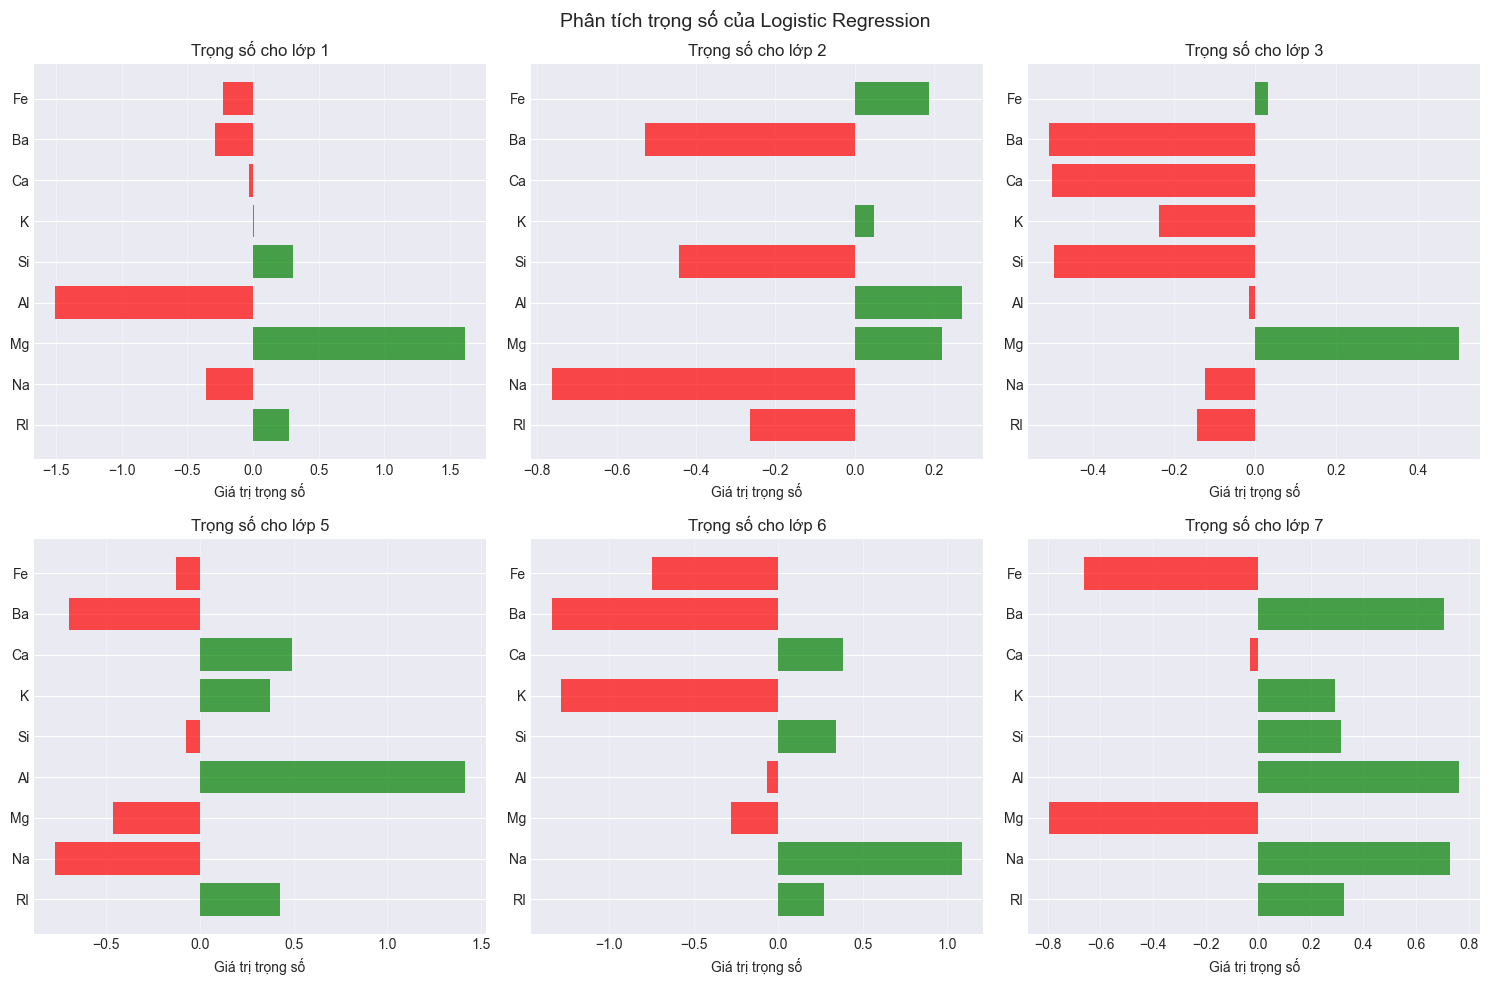

In [26]:
# Hiển thị trọng số của các đặc trưng
feature_names = glass_df.drop(['Id_Number', 'Type'], axis=1).columns
coefficients = lr_best.coef_

# Vẽ biểu đồ trọng số cho mỗi lớp
n_classes = len(np.unique(y_glass))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, class_label in enumerate(np.unique(y_glass)):
    if i < len(axes):
        ax = axes[i]
        coef = coefficients[i]
        colors = ['green' if c > 0 else 'red' for c in coef]
        ax.barh(feature_names, coef, color=colors, alpha=0.7)
        ax.set_title(f'Trọng số cho lớp {class_label}', fontsize=12)
        ax.set_xlabel('Giá trị trọng số', fontsize=10)
        ax.grid(True, alpha=0.3, axis='x')

# Ẩn các subplot thừa nếu có
for i in range(n_classes, len(axes)):
    axes[i].axis('off')

plt.suptitle('Phân tích trọng số của Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()

## Bài 5: Logistic Regression trên Iris Dataset

In [27]:
# Huấn luyện Logistic Regression trên Iris
lr_iris = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')
lr_iris.fit(X_train_iris_scaled, y_train_iris)

# Dự đoán
y_pred_lr_iris = lr_iris.predict(X_test_iris_scaled)

# Đánh giá
print("="*60)
print("KẾT QUẢ LOGISTIC REGRESSION TRÊN IRIS DATASET")
print("="*60)
print(f"\nĐộ chính xác: {accuracy_score(y_test_iris, y_pred_lr_iris):.4f}")
print(f"\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test_iris, y_pred_lr_iris))

KẾT QUẢ LOGISTIC REGRESSION TRÊN IRIS DATASET

Độ chính xác: 0.8444

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.79      0.73      0.76        15
   Virginica       0.75      0.80      0.77        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



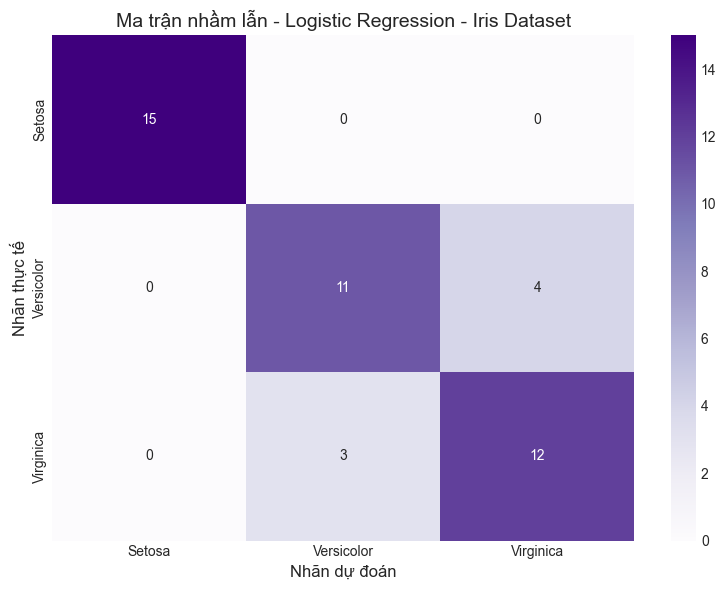

In [28]:
# Ma trận nhầm lẫn
cm_lr_iris = confusion_matrix(y_test_iris, y_pred_lr_iris)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_iris, annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y_iris),
            yticklabels=np.unique(y_iris))
plt.title('Ma trận nhầm lẫn - Logistic Regression - Iris Dataset', fontsize=14)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.tight_layout()
plt.show()

---
# PHẦN 4: SO SÁNH TỔNG QUAN CÁC MÔ HÌNH
---

## So sánh các mô hình trên Iris Dataset

In [30]:
# So sánh K-NN và Logistic Regression trên Iris
iris_comparison = {
    'Mô hình': ['K-NN', 'Logistic Regression'],
    'Độ chính xác': [
        accuracy_score(y_test_iris, y_pred_iris),
        accuracy_score(y_test_iris, y_pred_lr_iris)
    ],
    'Precision (macro)': [
        precision_score(y_test_iris, y_pred_iris, average='macro'),
        precision_score(y_test_iris, y_pred_lr_iris, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test_iris, y_pred_iris, average='macro'),
        recall_score(y_test_iris, y_pred_lr_iris, average='macro')
    ],
    'F1-Score (macro)': [
        f1_score(y_test_iris, y_pred_iris, average='macro'),
        f1_score(y_test_iris, y_pred_lr_iris, average='macro')
    ]
}

iris_comp_df = pd.DataFrame(iris_comparison)
print("\nSO SÁNH CÁC MÔ HÌNH TRÊN IRIS DATASET:")
print("="*70)
print(iris_comp_df.to_string(index=False))


SO SÁNH CÁC MÔ HÌNH TRÊN IRIS DATASET:
            Mô hình  Độ chính xác  Precision (macro)  Recall (macro)  F1-Score (macro)
               K-NN      0.955556           0.960784        0.955556          0.955357
Logistic Regression      0.844444           0.845238        0.844444          0.844271


## So sánh các mô hình trên MNIST Dataset

In [31]:
# Huấn luyện Logistic Regression trên MNIST
print("Đang huấn luyện Logistic Regression trên MNIST...")
lr_mnist = LogisticRegression(max_iter=100, random_state=42, solver='saga')
lr_mnist.fit(X_train_mnist_scaled, y_train_mnist_subset)

# Dự đoán
y_pred_lr_mnist = lr_mnist.predict(X_test_mnist_scaled)

# So sánh tất cả các mô hình
mnist_comparison = {
    'Mô hình': ['K-NN', 'Multinomial NB', 'Logistic Regression'],
    'Độ chính xác': [
        accuracy_score(y_test_mnist_subset, y_pred_mnist),
        accuracy_score(y_test_mnist_subset, y_pred_mnb),
        accuracy_score(y_test_mnist_subset, y_pred_lr_mnist)
    ],
    'Precision (macro)': [
        precision_score(y_test_mnist_subset, y_pred_mnist, average='macro'),
        precision_score(y_test_mnist_subset, y_pred_mnb, average='macro'),
        precision_score(y_test_mnist_subset, y_pred_lr_mnist, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test_mnist_subset, y_pred_mnist, average='macro'),
        recall_score(y_test_mnist_subset, y_pred_mnb, average='macro'),
        recall_score(y_test_mnist_subset, y_pred_lr_mnist, average='macro')
    ],
    'F1-Score (macro)': [
        f1_score(y_test_mnist_subset, y_pred_mnist, average='macro'),
        f1_score(y_test_mnist_subset, y_pred_mnb, average='macro'),
        f1_score(y_test_mnist_subset, y_pred_lr_mnist, average='macro')
    ]
}

mnist_comp_df = pd.DataFrame(mnist_comparison)
print("\nSO SÁNH CÁC MÔ HÌNH TRÊN MNIST DATASET:")
print("="*70)
print(mnist_comp_df.to_string(index=False))

Đang huấn luyện Logistic Regression trên MNIST...

SO SÁNH CÁC MÔ HÌNH TRÊN MNIST DATASET:
            Mô hình  Độ chính xác  Precision (macro)  Recall (macro)  F1-Score (macro)
               K-NN        0.9535           0.955466        0.952496          0.953283
     Multinomial NB        0.8385           0.844582        0.834320          0.837127
Logistic Regression        0.9115           0.910285        0.909803          0.909813

SO SÁNH CÁC MÔ HÌNH TRÊN MNIST DATASET:
            Mô hình  Độ chính xác  Precision (macro)  Recall (macro)  F1-Score (macro)
               K-NN        0.9535           0.955466        0.952496          0.953283
     Multinomial NB        0.8385           0.844582        0.834320          0.837127
Logistic Regression        0.9115           0.910285        0.909803          0.909813


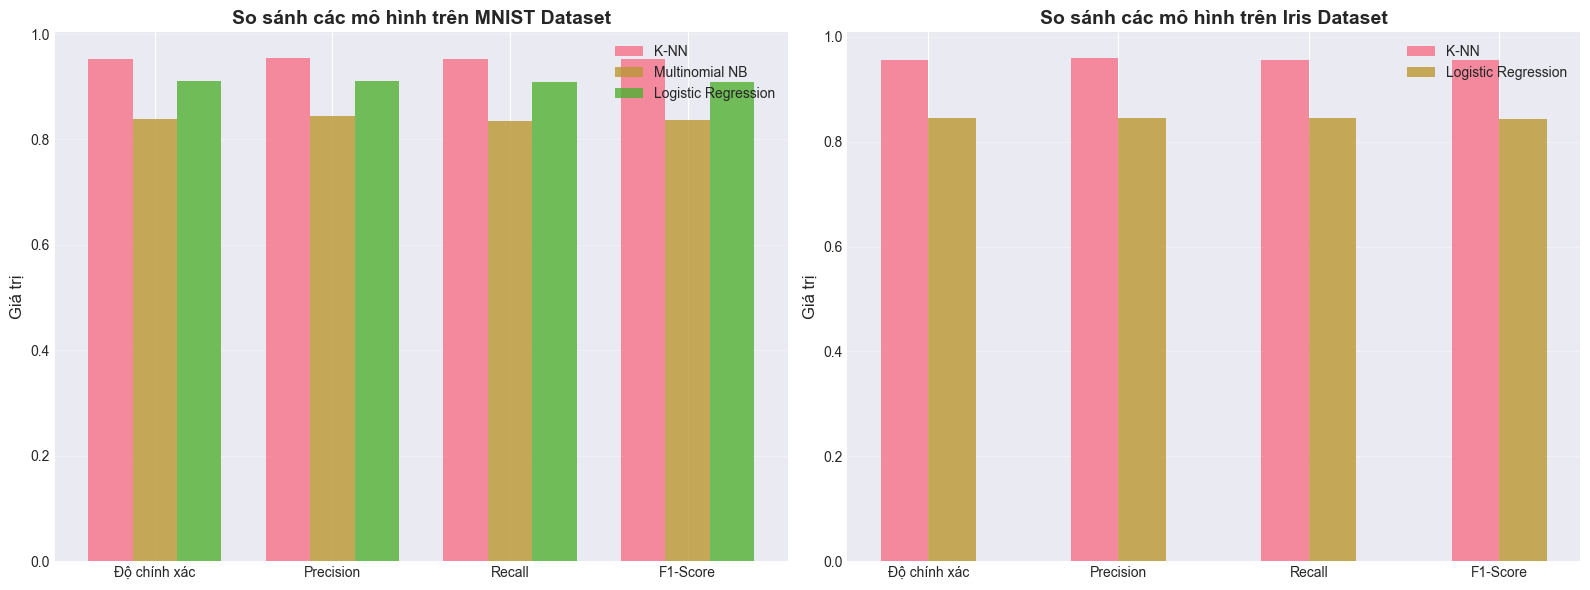

In [32]:
# Vẽ biểu đồ so sánh tổng quan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cho MNIST
metrics = ['Độ chính xác', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

ax1.bar(x - width, mnist_comp_df.iloc[0, 1:], width, label='K-NN', alpha=0.8)
ax1.bar(x, mnist_comp_df.iloc[1, 1:], width, label='Multinomial NB', alpha=0.8)
ax1.bar(x + width, mnist_comp_df.iloc[2, 1:], width, label='Logistic Regression', alpha=0.8)

ax1.set_ylabel('Giá trị', fontsize=12)
ax1.set_title('So sánh các mô hình trên MNIST Dataset', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, fontsize=10)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Biểu đồ cho Iris
ax2.bar(x - width/2, iris_comp_df.iloc[0, 1:], width, label='K-NN', alpha=0.8)
ax2.bar(x + width/2, iris_comp_df.iloc[1, 1:], width, label='Logistic Regression', alpha=0.8)

ax2.set_ylabel('Giá trị', fontsize=12)
ax2.set_title('So sánh các mô hình trên Iris Dataset', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics, fontsize=10)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()